In [1]:
import numpy as np
import matplotlib.pyplot as plt 

iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :4]
y = iris[:, 4]

N = X.shape[0] # 100
indices = np.random.permutation(N)
X = X[indices]
y = y[indices]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

print('X_b', X_b.shape)
print('y', y.shape)
print('N', N)

X_b (100, 5)
y (100,)
N 100


In [2]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

def predict(x, theta):    
    z = np.dot(x, theta)
    y_hat = sigmoid_function(z)
    
    return y_hat

In [3]:
lr = 0.01
num_iter = 100

theta = np.array([0.1, 0.3, 0.1, 0.2, -0.1])

losses = []
preds   = []
accuracies = []


for epoch in range(num_iter):
    for i in range(0, N):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        
        # compute output
        y_hat = predict(xi, theta)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute mean of gradient
        gradient = np.dot(xi.T, (y_hat - yi))

        # update
        theta = theta - lr*gradient  

        #===============================
        # loss
        losses.append(loss)

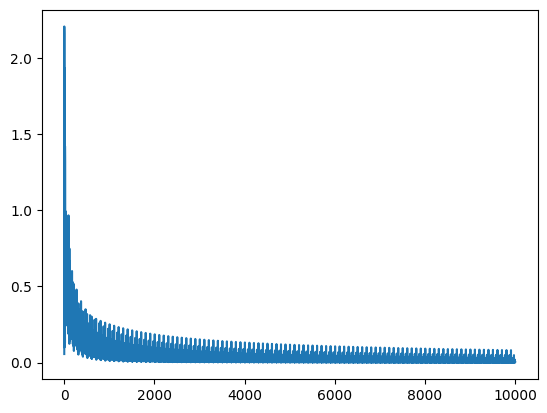

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()